In [1]:
from fastbook import *

In [3]:
urls = search_images_ddg('Iron man', max_images = 1)
download_url(urls[0], 'iron_man.jpg')

Path('iron_man.jpg')

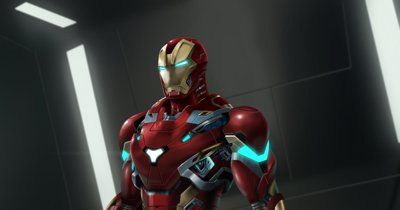

In [12]:
Image.open('iron_man.jpg').to_thumb(400, 400)

In [9]:
urls = search_images_ddg('hulk', max_images = 1)
download_url(urls[0], 'hulk.jpg')

Path('hulk.jpg')

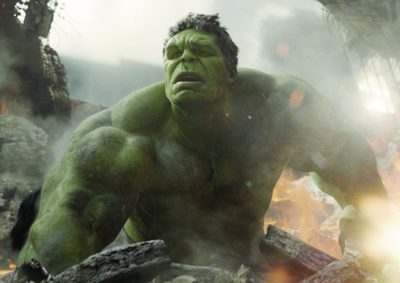

In [11]:
Image.open('hulk.jpg').to_thumb(400, 400)

In [17]:
characters = 'spider man', 'hulk', 'captain america', 'iron man', 'black panther', 'thor', 'wanda maximoff', 'doctor strange', 'thanos', 'ms marvel', 'black widow'
path = Path('Marvel_Characters')

for character in characters:
    dest = Path(path/character)
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls = search_images_ddg(f'{character} marvel character photos', max_images = 20))

In [48]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [61]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(224, method = 'squish')]
).dataloaders(path)

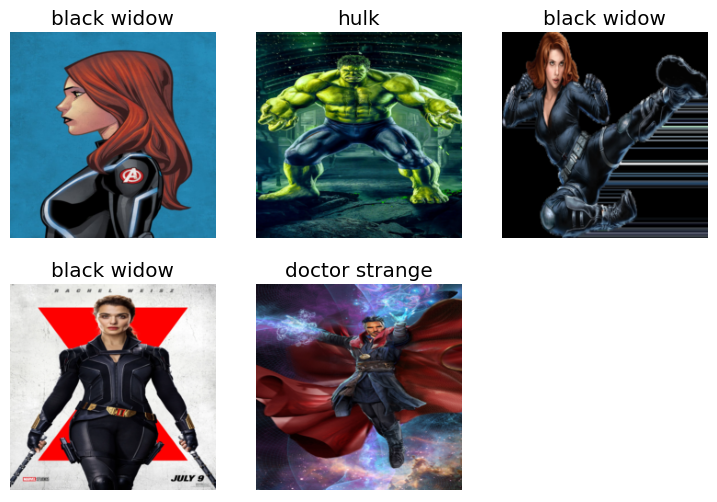

In [64]:
dls.show_batch(max_n = 5)

In [66]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.928968,4.216041,0.904762,00:17


epoch,train_loss,valid_loss,error_rate,time
0,3.637420,3.563574,0.952381,00:20
1,3.409529,2.812445,0.857143,00:19
2,2.941405,2.244053,0.666667,00:18
3,2.464293,1.929961,0.619048,00:18
4,2.073418,1.786381,0.571429,00:18


In [67]:
learn.predict('iron_man.jpg')

('iron man',
 tensor(4),
 tensor([0.0166, 0.0038, 0.1018, 0.0007, 0.5357, 0.0183, 0.0855, 0.2376]))

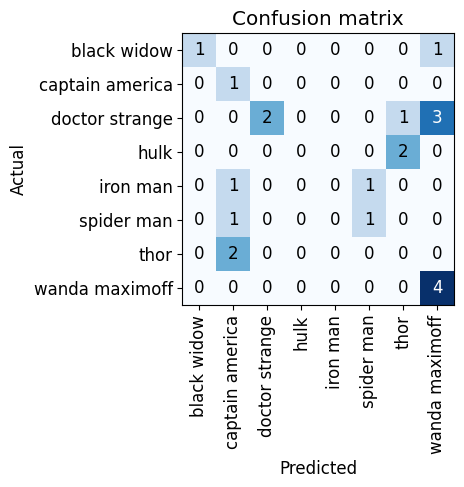

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [45]:
interp.plot_top_losses(10)

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\LENOVO\\Desktop\\Sonali's Folder\\Desktop files\\TRT\\Python\\Marvel_Characters\\hulk\\60beb805-52be-4aae-a266-01b28b9eb1fe.jpg"